In [1]:
import pandas as pd
import nltk
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import statsmodels
%matplotlib inline

In [2]:
treatments = pd.read_csv('intervention_browse.txt', sep='|')
treatments.head()

,MESH_INTERVENTION_ID,NCT_ID,MESH_TERM
0,42,NCT00000173,Vitamins
1,43,NCT00000174,Rivastigmine
2,44,NCT00000176,Estrogens
3,45,NCT00000177,Estrogens
4,46,NCT00000178,Prednisone


In [4]:
term_counts = treatments['MESH_TERM'].value_counts()
term_counts[0:5]

Paclitaxel                1884
Cyclophosphamide          1666
Gemcitabine               1593
Antibodies, Monoclonal    1569
Bevacizumab               1551
Name: MESH_TERM, dtype: int64

In [5]:
mesh = pd.read_csv('mesh_thesaurus.txt', sep='|')
mesh.head()

,MESH_ID,MESH_TERM
0,A02.835.232.781.750.400,"Cranial Fossa, Posterior"
1,A02.835.232.781.802,Sphenoid Bone
2,A02.835.232.781.802.662,Sella Turcica
3,A02.835.232.781.885,Temporal Bone
4,A02.835.232.781.885.444,Mastoid


In [6]:
#would like to aggregate these by type of intervention (MT inhibitor, DNA repair inhibitor, etc.)

In [8]:
keywords = pd.read_csv('keywords.txt', sep='|')
keywords['KEYWORD'].value_counts()[0:20]

HIV                 1555
Obesity             1183
Pharmacokinetics    1162
Depression          1061
Cancer              1022
Safety              1008
COPD                 913
Pain                 903
Diabetes             869
pharmacokinetics     856
Exercise             805
pain                 797
safety               781
Schizophrenia        756
cancer               728
Children             721
Asthma               714
children             700
breast cancer        699
Breast Cancer        689
Name: KEYWORD, dtype: int64

In [9]:
#these need to be lower() for aggregating

In [18]:
keywords['key_lowered'] = keywords['KEYWORD'].str.lower()

In [33]:
plottable = keywords['key_lowered'].value_counts().to_dict()
import operator
plot_sort = sorted(plottable.items(), key=operator.itemgetter(1), reverse=True)
plot_sort[0:50]

[('pharmacokinetics', 2022),
 ('obesity', 1868),
 ('breast cancer', 1795),
 ('safety', 1795),
 ('quality of life', 1793),
 ('cancer', 1752),
 ('pain', 1702),
 ('depression', 1650),
 ('hiv', 1563),
 ('diabetes', 1489),
 ('children', 1425),
 ('exercise', 1382),
 ('stroke', 1093),
 ('schizophrenia', 1087),
 ('hypertension', 1083),
 ('asthma', 1079),
 ('inflammation', 973),
 ('treatment', 947),
 ('prevention', 923),
 ('copd', 922),
 ('pregnancy', 887),
 ('chemotherapy', 882),
 ('heart failure', 880),
 ('prostate cancer', 879),
 ('physical activity', 791),
 ('vaccine', 779),
 ('surgery', 748),
 ('rehabilitation', 739),
 ('pediatric', 732),
 ('efficacy', 718),
 ('healthy volunteers', 694),
 ('lung cancer', 681),
 ('randomized controlled trial', 677),
 ('healthy volunteer', 673),
 ('type 2 diabetes', 665),
 ('diabetes mellitus', 664),
 ('coronary artery disease', 639),
 ('mri', 628),
 ('anxiety', 622),
 ('elderly', 616),
 ('leukemia', 608),
 ('insulin resistance', 604),
 ('osteoarthritis', 59

In [45]:
get_x = lambda x: x[0]
get_y = lambda x: x[1]
x_labels = pd.Series([x for x in map(get_x, plot_sort[0:25])])
y_labels = pd.Series([x for x in map(get_y, plot_sort[0:25])])
len(x_labels), len(y_labels)

(25, 25)

[None, None, None, None, None, None]

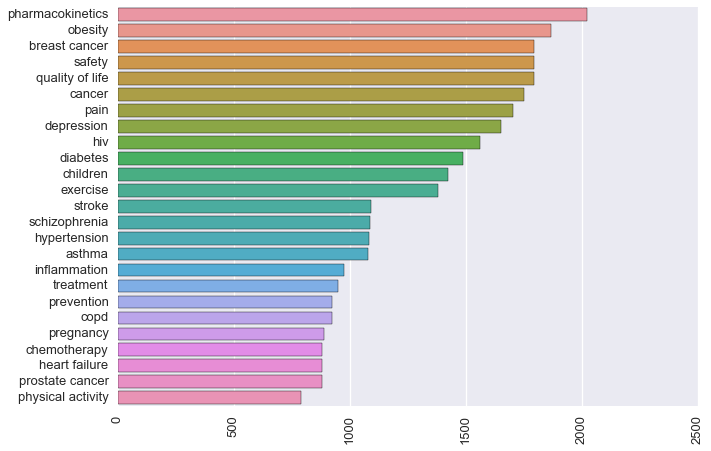

In [47]:
sns.set_context("talk")
sns.barplot(y_labels, x_labels)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)

In [12]:
outcomes = pd.read_csv('study_outcome.txt', sep='|', error_bad_lines=False)
outcomes.head()

b'Skipping line 341181: expected 7 fields, saw 10\n'
b'Skipping line 603289: expected 7 fields, saw 9\n'


,OUTCOME_ID,NCT_ID,STUDY_OUTCOMES_TYPE,MEASURE,SAFETY_ISSUE,TIME_FRAME,DESCRIPTION
0,48,NCT00000199,primary outcome,Adverse effects,NaN,NaN,NaN
1,49,NCT00000199,primary outcome,Clinical status,NaN,NaN,NaN
2,50,NCT00000200,primary outcome,Interaction of cocaine and meds on cardio,Yes,3 hr,NaN
3,51,NCT00000200,primary outcome,Interaction of cocaine & meds on coc's subjective,Yes,3 hr,NaN
4,52,NCT00000200,primary outcome,Effects of medication on cocaine craving,No,3 hr,NaN


In [14]:
outcomes['STUDY_OUTCOMES_TYPE'].unique()

array(['primary outcome', 'secondary outcome', 'other outcome', nan], dtype=object)

In [15]:
conditions = pd.read_csv('condition_browse.txt', sep='|')
conditions.head()

,MESH_CONDITION_ID,NCT_ID,MESH_TERM
0,142,NCT00000211,Cocaine-Related Disorders
1,143,NCT00000211,Heroin Dependence
2,144,NCT00000212,Cocaine-Related Disorders
3,145,NCT00000213,Cocaine-Related Disorders
4,146,NCT00000214,Cocaine-Related Disorders


In [48]:
conditions['MESH_TERM'].value_counts()[0:25]

Breast Neoplasms                          4713
Diabetes Mellitus, Type 2                 4351
Diabetes Mellitus                         3441
Syndrome                                  3377
Coronary Artery Disease                   3276
Lung Neoplasms                            3078
Carcinoma, Non-Small-Cell Lung            2953
Leukemia                                  2876
Myocardial Ischemia                       2873
Coronary Disease                          2830
Prostatic Neoplasms                       2756
Lymphoma                                  2714
Depression                                2559
Carcinoma                                 2525
Hypertension                              2518
Depressive Disorder                       2377
Cardiovascular Diseases                   2291
Infection                                 2112
Neoplasms                                 2082
Pulmonary Disease, Chronic Obstructive    2056
Heart Failure                             2048
Hepatitis    

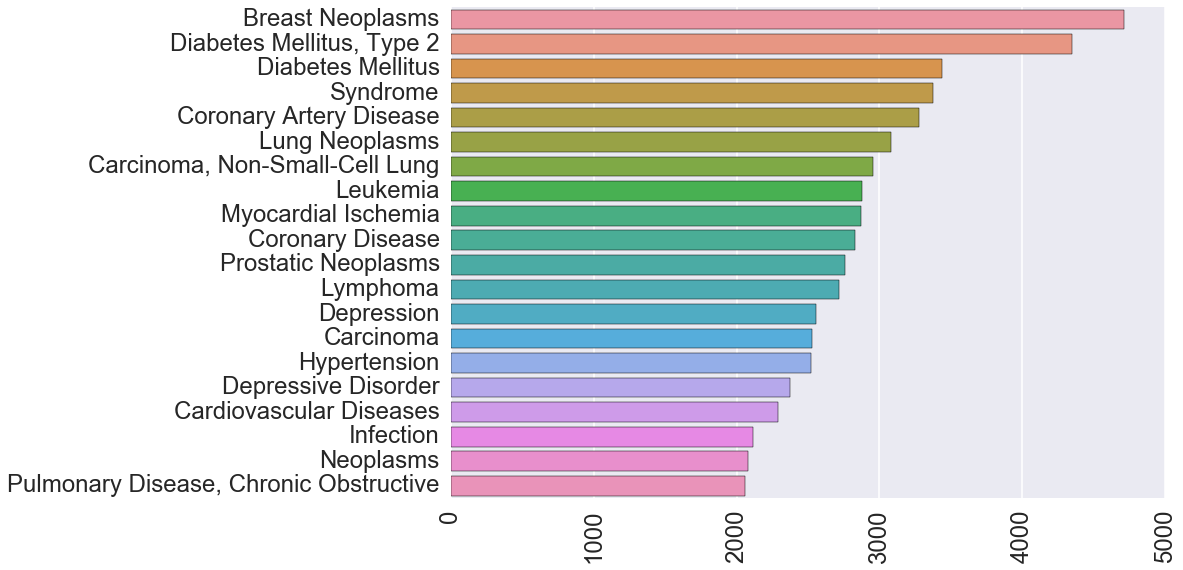

In [82]:
make_countplot(conditions, 'MESH_TERM')

In [17]:
conditions.shape

(327949, 3)

In [49]:
#want to aggregate all the ones with 'Neoplasms', 'Carcinoma', 'Leukemia', 'Lymphoma'

In [50]:
def tokenize(x):
    """ Tokenize 
        :param: x (str)
        :return: 
    """
    words = nltk.word_tokenize(x.lower())
    return words

In [52]:
tokens = [tokenize(x) for x in conditions['MESH_TERM']]

In [57]:
import itertools
flatten1 = itertools.chain.from_iterable
flattened = [x for x in flatten1(tokens)]

In [58]:
flattened[0:5]

['cocaine-related', 'disorders', 'heroin', 'dependence', 'cocaine-related']

In [59]:
counts = nltk.FreqDist(flattened)

In [60]:
import operator
sortbycounts = sorted(counts.items(), key=operator.itemgetter(1), reverse=True)

In [61]:
sortbycounts[0:15]

[(',', 78207),
 ('neoplasms', 31992),
 ('diseases', 19873),
 ('disease', 17987),
 ('syndrome', 11281),
 ('leukemia', 10949),
 ('disorders', 10888),
 ('lung', 10635),
 ('chronic', 10610),
 ('carcinoma', 10400),
 ('diabetes', 9510),
 ('mellitus', 9183),
 ('hepatitis', 8235),
 ('lymphoma', 7955),
 ('disorder', 7224)]

In [62]:
places = pd.read_csv("authorities.txt", sep='|')
places.head()

,AUTHORITY_ID,NCT_ID,AUTHORITY
0,173,NCT00000335,United States: Federal Government
1,174,NCT00000336,United States: Federal Government
2,175,NCT00000337,United States: Federal Government
3,176,NCT00000338,United States: Federal Government
4,177,NCT00000339,United States: Federal Government


In [83]:
places['AUTHORITY'].value_counts()[0:5]

United States: Food and Drug Administration                 49529
United States: Institutional Review Board                   44941
United States: Federal Government                           19383
Canada: Health Canada                                        7683
Germany: Federal Institute for Drugs and Medical Devices     6960
Name: AUTHORITY, dtype: int64

In [64]:
#also need to be split & normalized to be aggregated, e.g. 'the Netherlands', 
#['united States:', "United States;"]

In [81]:
def make_countplot(df, colname, top=20):
    """ reusable method to make horizontal histograms
        defaults to getting plotting top 25 most common"""
    plottable = df[colname].value_counts().to_dict()
    plot_sort = sorted(plottable.items(), key=operator.itemgetter(1), reverse=True)
    get_x = lambda x: x[0]
    get_y = lambda x: x[1]
    x_labels = pd.Series([x for x in map(get_x, plot_sort[0:top])])
    y_labels = pd.Series([x for x in map(get_y, plot_sort[0:top])])
    sns.set_context("poster", font_scale = 1.5)
    sns.barplot(y_labels, x_labels)
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=90)

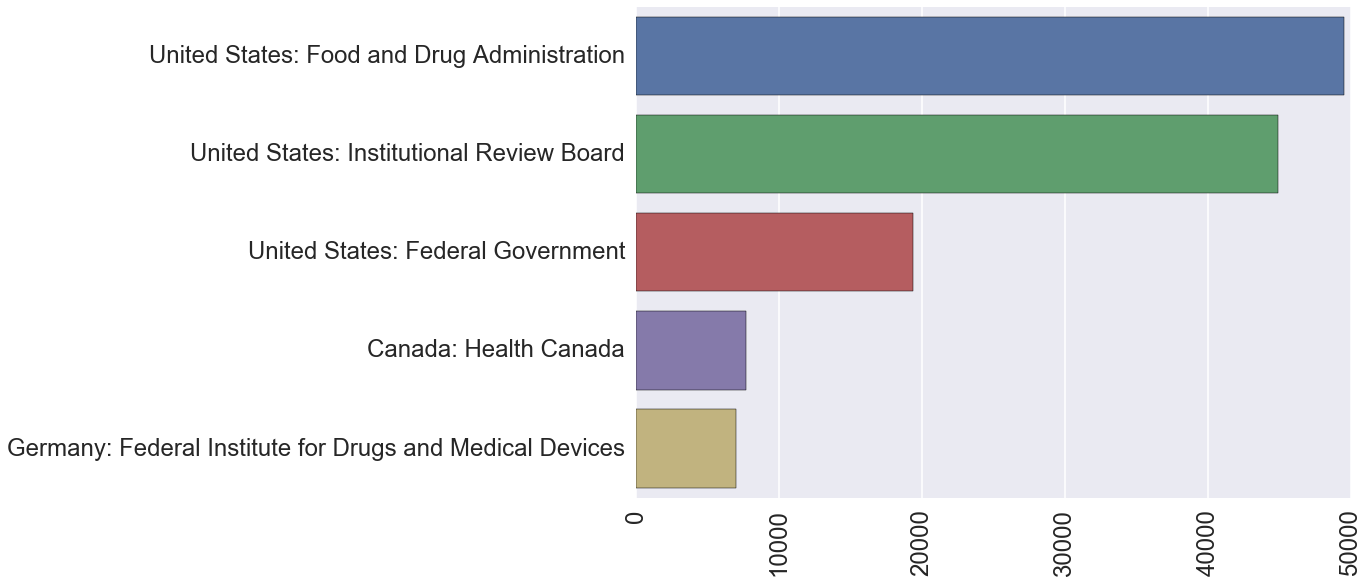

In [78]:
make_countplot(places, 'AUTHORITY', top=5)